In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data 

In [2]:
item_cat=pd.read_csv("item_categories.csv")
item=pd.read_csv("items.csv")
sales = pd.read_csv("sales_train.csv.gz")
# sub=pd.read_csv("sample_submission.csv.gz")
shops=pd.read_csv("shops.csv")
test=pd.read_csv("test.csv.gz")

In [3]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# Data 분석

# 월별 item 거래량 확인
- 13년도 12월, 14년도 12월에 이상값을 보임

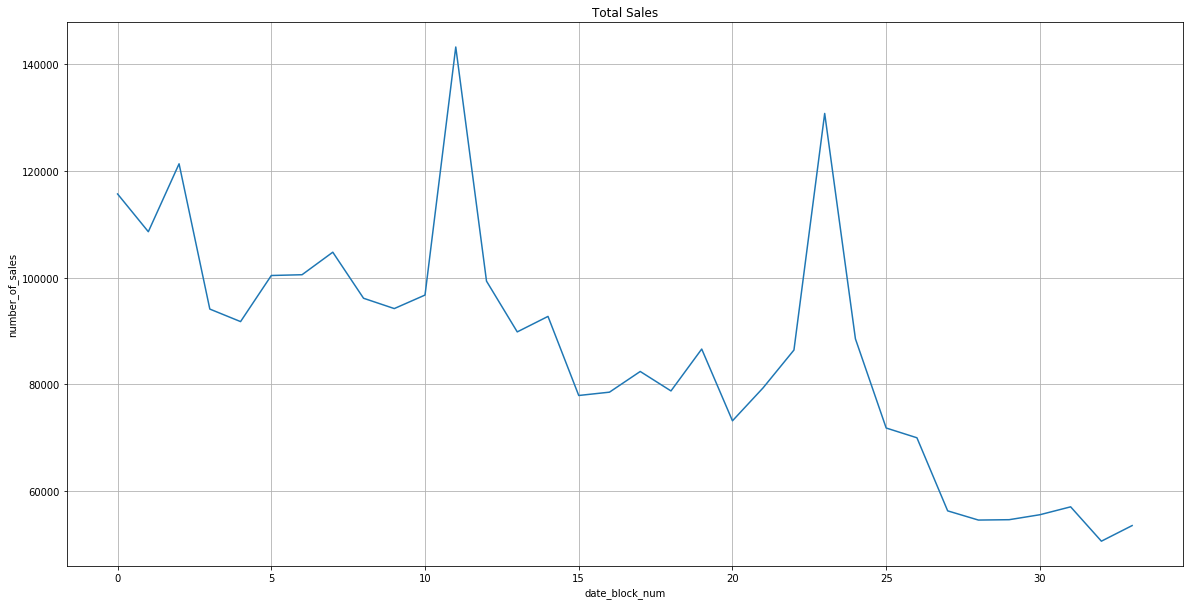

In [5]:
df = pd.DataFrame(sales.groupby(['date_block_num'])['item_id'].count())
plt.figure(figsize=(20,10))
plt.title('Total Sales')
plt.xlabel('date_block_num')
plt.ylabel('number_of_sales')
plt.grid()
plt.plot(df)
### 11과 23에 이상값을 보임 --> 11은 13년도 12월, 23은 14년도 12월

In [6]:
sales[sales['date_block_num']==11].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1124316,04.12.2013,11,25,17769,199.0,1.0
1124317,15.12.2013,11,25,18016,500.0,1.0
1124318,22.12.2013,11,25,17763,399.0,1.0
1124319,31.12.2013,11,25,17760,3250.0,1.0
1124320,18.12.2013,11,25,17763,398.5,1.0


In [7]:
sales[sales['date_block_num']==23].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2192637,24.12.2014,23,42,17279,299.0,1.0
2192638,27.12.2014,23,42,17315,399.0,1.0
2192639,24.12.2014,23,42,17315,399.0,1.0
2192640,21.12.2014,23,42,17315,399.0,1.0
2192641,20.12.2014,23,42,17315,399.0,2.0


#### 월별 item거래량을 확인한 결과 매년 12월에는 거래량이 늘어난다는 것을 알게됨

# 월별 Shop의 item 거래량 확인

In [8]:
df = pd.DataFrame(sales.groupby(['shop_id','date_block_num'])['item_id'].count()).reset_index()
df.head()

,shop_id,date_block_num,item_id
0,0,0,4793
1,0,1,5064
2,1,0,2694
3,1,1,2984
4,2,0,1071


In [9]:
df_1 = pd.DataFrame(df.groupby(['shop_id'])['date_block_num'].sum())
df_1.head()

,date_block_num
shop_id,
0,1
1,1
2,561
3,561
4,561


In [10]:
df_2 = df_1[pd.DataFrame(df.groupby(['shop_id'])['date_block_num'].sum())['date_block_num']<300]
no_shop_index = df_2.index
df_2

,date_block_num
shop_id,
0,1
1,1
8,6
9,90
11,25
13,190
17,290
20,54
23,6


#### 월별 shop item 거래량을 확인하던 중 초반에만 item거래가 있다가 나중에는 없는 shop들을 발견함

# 많이 거래되는 또는 거래가 너무 되지 않는 Item 확인

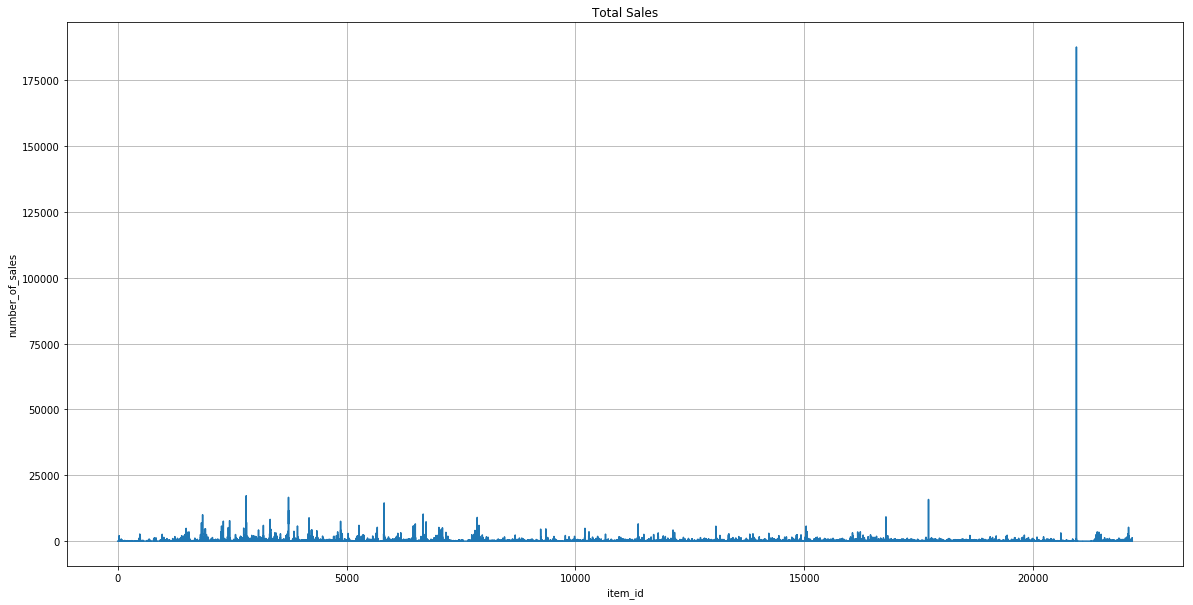

In [11]:
df = pd.DataFrame(sales.groupby(['item_id'])['item_cnt_day'].sum())
plt.figure(figsize=(20,10))
plt.title('Total Sales')
plt.xlabel('item_id')
plt.ylabel('number_of_sales')
plt.grid()
plt.plot(df)

In [12]:
pd.DataFrame(sales.groupby(['item_id'])['item_cnt_day'].sum()).sort_values(by=['item_cnt_day'], ascending=False)[:10]

,item_cnt_day
item_id,
20949,187642.0
2808,17245.0
3732,16642.0
17717,15830.0
5822,14515.0
3734,11688.0
6675,10289.0
3731,10099.0
1855,10032.0


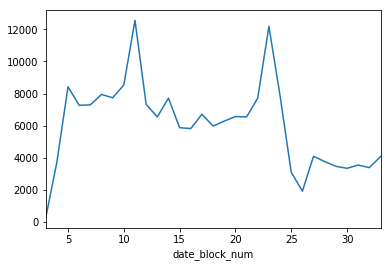

In [13]:
df = sales[sales['item_id'] == 20949].groupby(['date_block_num'])['item_cnt_day'].sum()
df.plot()

In [14]:
item_top_index = pd.DataFrame(sales.groupby(['item_id'])['item_cnt_day'].sum()).sort_values(by=['item_cnt_day'], ascending=False)[:9].index
item[item['item_id'].isin(item_top_index)]
# 20949 - Company T-shirt packs are white (34*42)
# 2808 - 디아블로 III[PC, Jewel, 러시아 버전]
# 3732 - 그랜드 테프트 오토 V[PS3]
# 17717 - 1S/S/S/S/S온라인 자금 수령

,item_name,item_id,item_category_id
1855,"Battlefield 4 [PC, русская версия]",1855,30
2808,"Diablo III [PC, Jewel, русская версия]",2808,30
3731,"Grand Theft Auto V [PC, русские субтитры]",3731,30
3732,"Grand Theft Auto V [PS3, русские субтитры]",3732,19
3734,"Grand Theft Auto V [Xbox 360, русские субтитры]",3734,23
5822,Playstation Store пополнение бумажника: Карта ...,5822,35
6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,6675,12
17717,Прием денежных средств для 1С-Онлайн,17717,79
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [15]:
pd.DataFrame(sales.groupby(['item_id'])['item_cnt_day'].sum()).sort_values(by=['item_cnt_day'], ascending=True)[:10]

,item_cnt_day
item_id,
1590,-11.0
13474,-1.0
11871,-1.0
18062,-1.0
13477,0.0
7547,0.0
8515,0.0
4591,0.0
7181,1.0


In [16]:
item_low_index = pd.DataFrame(sales.groupby(['item_id'])['item_cnt_day'].sum()).sort_values(by=['item_cnt_day'], ascending=True)[:8].index
item[item['item_id'].isin(item_low_index)]
# 1590 - 어쌔신 크리드 3: Free University
# 13474 - 문자메세지를 보내시오
# 11871 - 편지
# 18062 - 편지

,item_name,item_id,item_category_id
1590,"Assassin’s Creed 3. Freedom Edition [PC, русск...",1590,29
4591,"MCCARTNEY, PAUL In Red Square (Фирм.)",4591,59
7547,VideoStudio Pro X6 IE Windows Mini-Box,7547,75
8515,Английский язык. 2 - 5 класс (Jewel),8515,77
11871,Змея,11871,62
13474,Комплект «Sony PS3 (320 Gb) (CECH-2508B) + игр...,13474,11
13477,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,13477,11
18062,Робопет Собака,18062,62


#### 특정 item들이 많이 팔리고 안팔리고 환불만 되는 Item도 있다

# 데이터 전처리

1. 12월에 많이 팔림 -- 이상값 제거
2. 초반에만 팔리고 나중에는 영업을 안하는 shop들이 있음 -- 초반에만 영업하는 shop들 제거
3. 특정 item들이 많이 팔림, 안 팔림 -- 이상값 제거

In [17]:
new_sales = sales[sales.date_block_num !=11]
new_sales = new_sales[new_sales.date_block_num !=23]

In [18]:
# new_sales = new_sales[~new_sales['shop_id'].isin(no_shop_index)]
new_sales = new_sales[~new_sales['item_id'].isin(item_top_index)]
new_sales = new_sales[~new_sales['item_id'].isin(item_low_index)]

In [19]:
item_top_index

Int64Index([20949, 2808, 3732, 17717, 5822, 3734, 6675, 3731, 1855], dtype='int64', name='item_id')

In [20]:
item_low_index

Int64Index([1590, 13474, 11871, 18062, 13477, 7547, 8515, 4591], dtype='int64', name='item_id')

In [21]:
sales.shape, new_sales.shape

((2935849, 6), (2587260, 6))

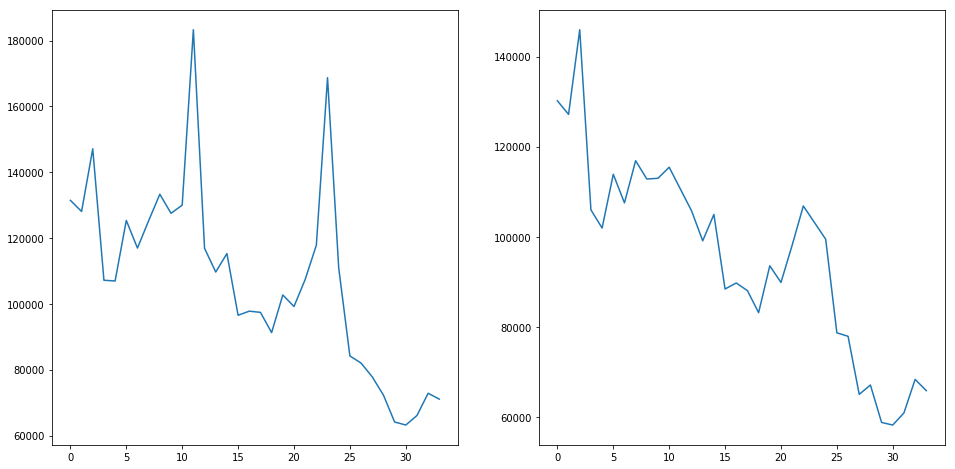

In [22]:
train_df_num_1 = sales.groupby('date_block_num')['item_cnt_day'].sum()
train_df_num_2 = new_sales.groupby('date_block_num')['item_cnt_day'].sum()
fig = plt.figure()
fig.set_size_inches(16,8)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(train_df_num_1)
ax_2.plot(train_df_num_2)

In [23]:
new_sales = new_sales[new_sales.date_block_num !=2]

In [24]:
sales.shape, new_sales.shape

((2935849, 6), (2466782, 6))

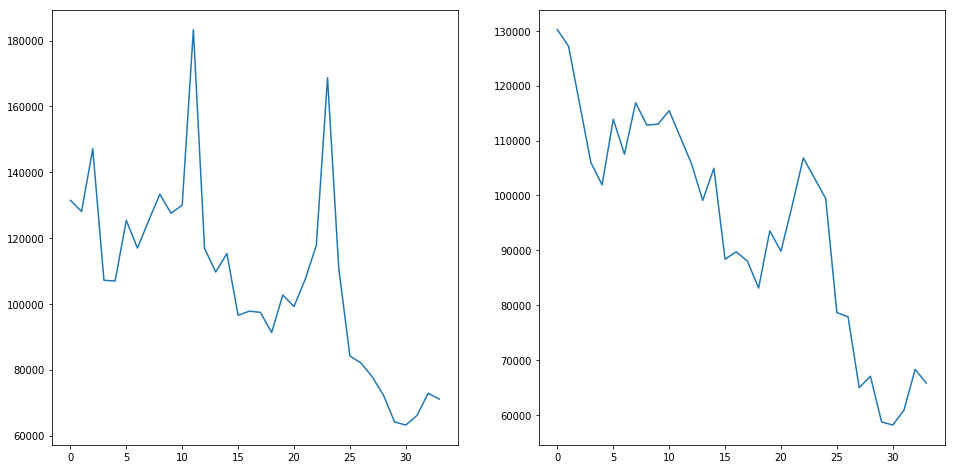

In [25]:
train_df_num_1 = sales.groupby('date_block_num')['item_cnt_day'].sum()
train_df_num_2 = new_sales.groupby('date_block_num')['item_cnt_day'].sum()
fig = plt.figure()
fig.set_size_inches(16,8)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(train_df_num_1)
ax_2.plot(train_df_num_2)

In [26]:
# sales_13 = sales[:1267562] #13년도 데이터
# sales_14 = sales[1267562:2323423] #14년도 데이터
# sales_15 = sales[2323423:] #15년도 10월까지 데이터

# # 13년도 월별 item 거래량
# df_13 = pd.DataFrame(sales_13.groupby(['date_block_num'])['item_cnt_day'].sum())
# # 14년도 월별 item 거래량
# df_14 = pd.DataFrame(sales_14.groupby(['date_block_num'])['item_cnt_day'].sum())
# # 15년도 월별 item 거래량
# df_15 = pd.DataFrame(sales_15.groupby(['date_block_num'])['item_cnt_day'].sum())

# plt.subplot(211)
# plt.plot(df_13)

# plt.subplot(212)
# plt.plot(df_14, 'r')

# # plt.subplot(313)
# # plt.plot(df_15, 'g')

In [28]:
sales_all = new_sales.drop(columns=['date_block_num', 'date', 'item_price'])
x_train = sales_all
y_train = x_train.pop('item_cnt_day')

In [29]:
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()
test_id_idx = test.pop('ID')
x_test = test.as_matrix()

c:\users\lg\appdata\local\conda\conda\envs\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\lg\appdata\local\conda\conda\envs\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\lg\appdata\local\conda\conda\envs\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [30]:
x_train.shape, y_train.shape, x_test.shape

((2466782, 2), (2466782,), (214200, 2))

# Build Model

In [31]:
from sklearn import linear_model

In [32]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
# Make predictions using the testing set
submit = pd.DataFrame({'ID': test_id_idx, 'item_cnt_month': regr.predict(x_test)})
submit.head()

,ID,item_cnt_month
0,0,1.221673
1,1,1.220180
2,2,1.220639
3,3,1.220645
4,4,1.220455


In [34]:
submit.to_csv('submission_linear_regression.csv', index=False)
# 제출값 1.55635 - 전제 데이터 다 넣었을 때
# 제출값 1.55296 - 12월달 데이터만 없앴을 때
# 제출값 1.54891 - 12월달 데이터와 shop_id에서 제일 많이 팔린 shop_id=31인 데이터 삭제했을 때
# 제출값 1.51101 - 2월달 데이터와 shop_id에서 제일 많이 팔린 shop_id=31인 데이터 삭제 + 가장 많이 팔린 item_id 20949삭제했을 때